In [1]:
import torch

In [2]:
x = torch.randn([1, 100, 3])
x

tensor([[[ 0.1672,  0.0840,  0.8830],
         [ 1.4893, -1.3481, -0.7001],
         [-0.2388, -1.6460,  0.0818],
         [-1.5766, -0.3808, -0.4507],
         [ 1.5837,  1.5631,  0.2843],
         [ 0.0187, -2.8788,  1.4507],
         [ 1.7548, -0.7063, -1.4841],
         [ 0.3104, -0.1328,  0.8196],
         [ 1.1243, -0.4474, -0.3081],
         [ 0.3751, -1.5518, -0.2568],
         [ 0.0853,  2.5399, -0.1951],
         [-1.6391, -0.2763,  0.4202],
         [ 1.2400, -0.2751,  0.6230],
         [ 1.2229, -1.5195,  0.4438],
         [ 0.4218, -0.5359,  0.3963],
         [-1.4927, -0.5910,  2.3715],
         [-1.3241,  0.7424,  3.3563],
         [-1.0838,  1.5167,  1.6448],
         [ 0.9400,  1.3943, -0.1180],
         [-3.6316, -1.7244,  2.1836],
         [ 0.7229,  0.2798,  0.7249],
         [ 1.0920, -0.8131,  1.1792],
         [ 0.8150, -0.5110,  1.9150],
         [-0.0103, -0.7326, -1.3414],
         [ 0.9978, -1.3046,  0.7551],
         [-0.7477,  0.2209,  1.9899],
         [ 1

In [3]:
target = torch.randn([1, 100, 64])
target

tensor([[[-0.6771, -0.1712,  0.3397,  ...,  0.1593, -0.2307,  0.7236],
         [ 0.2831,  0.3317,  0.5735,  ..., -2.4782,  0.3650, -0.4080],
         [-0.3145,  0.6728,  0.8164,  ...,  0.2762,  2.6083,  1.5832],
         ...,
         [-2.2643, -0.3935, -0.8366,  ...,  0.7971, -1.5535, -1.1754],
         [ 0.4251, -0.6645,  0.8439,  ..., -0.2647,  1.5399,  0.9097],
         [ 0.5709, -1.2518, -0.6568,  ...,  0.7015,  0.7742, -0.7415]]])

In [4]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(3, 64)  # w*x+b, w - weight, b - bias

    def forward(self, x):  # __call__ -> forward()
        x = self.fc1(x)
        return x

In [5]:
model = Net()

In [6]:
model(x)

tensor([[[ 0.1048,  0.0891, -0.8484,  ..., -0.0951,  0.4015,  0.2433],
         [-0.9267,  0.8299, -1.2362,  ..., -0.2093,  0.5401,  0.4366],
         [-0.4939,  0.2838, -0.7321,  ..., -0.5732, -0.2631,  0.1240],
         ...,
         [ 0.0732,  0.0198, -0.7937,  ..., -0.2050,  0.1743,  0.1643],
         [ 0.5262,  0.0334, -0.0099,  ..., -0.4634,  0.1974,  0.3200],
         [ 0.3786, -0.6723, -0.8149,  ..., -0.3283, -0.6283, -0.2892]]],
       grad_fn=<ViewBackward0>)

In [7]:
model(x).shape

torch.Size([1, 100, 64])

In [8]:
criterion = torch.nn.MSELoss()

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0003)

In [10]:
output = model(x)
loss = criterion(output, target)
print('Loss: ', loss.item())
optimizer.zero_grad()  # w.grad, b.grad - reset to zero
loss.backward()  # update w.grad, b.grad

Loss:  1.5101144313812256


### Back propagation

In [11]:
(output-target).shape

torch.Size([1, 100, 64])

In [12]:
grad = (output-target)/3200

In [13]:
x.shape

torch.Size([1, 100, 3])

In [14]:
grad.shape

torch.Size([1, 100, 64])

In [15]:
grad.reshape(100,64).T.matmul(x.reshape(100, 3))

tensor([[-8.3124e-03,  3.6453e-03,  1.6108e-02],
        [ 5.6234e-03, -3.1721e-03, -7.6138e-03],
        [-2.2333e-02,  1.1727e-04, -1.2326e-02],
        [-1.5046e-02, -6.2538e-03,  1.0127e-02],
        [-2.7350e-02, -1.8394e-02,  2.6950e-02],
        [-1.9679e-02, -2.2962e-02, -1.7614e-02],
        [ 8.9725e-03,  1.7465e-02, -1.0113e-02],
        [-2.1541e-02,  3.9864e-03,  1.4775e-02],
        [ 1.0547e-02, -1.1739e-02, -9.8374e-03],
        [-1.0445e-02, -1.8642e-02,  1.1468e-02],
        [ 2.8209e-02,  3.5153e-03,  2.6211e-04],
        [-6.9717e-03,  1.4948e-02,  9.0812e-03],
        [ 4.9630e-03, -7.6286e-03,  3.1732e-03],
        [ 2.9980e-02,  1.3697e-02, -7.8911e-03],
        [-4.6958e-03, -1.8132e-02, -2.3604e-03],
        [-4.6956e-03, -4.1468e-03, -1.1782e-02],
        [-9.3033e-04,  1.2197e-03, -3.5645e-03],
        [ 2.2095e-02,  1.4918e-02,  2.5941e-03],
        [ 4.1938e-03, -6.8099e-03, -1.8307e-02],
        [-5.0575e-03, -1.4906e-03,  3.1309e-03],
        [ 1.4756e-02

In [16]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2022,  0.2926,  0.2181],
         [ 0.0497,  0.1260, -0.5404],
         [-0.5503,  0.2777, -0.4658],
         [-0.3435, -0.2050,  0.3157],
         [-0.4476, -0.4933,  0.5015],
         [-0.4634, -0.5505, -0.4025],
         [ 0.1330,  0.4343, -0.2217],
         [-0.4805,  0.2141,  0.4099],
         [ 0.2768, -0.3707, -0.1700],
         [-0.2988, -0.5308,  0.2409],
         [ 0.5725,  0.0858,  0.0523],
         [-0.0681,  0.4432,  0.3380],
         [ 0.1669, -0.2026,  0.2036],
         [ 0.5587,  0.2218, -0.1595],
         [ 0.0407, -0.3309, -0.1208],
         [-0.1462,  0.0711, -0.4152],
         [-0.0332,  0.0036, -0.0768],
         [ 0.4360,  0.3892,  0.0593],
         [ 0.0916, -0.0441, -0.4469],
         [-0.0964, -0.2696,  0.2726],
         [ 0.2597,  0.2757, -0.1263],
         [-0.0978, -0.2159,  0.4269],
         [ 0.2662,  0.2426, -0.3434],
         [ 0.4635,  0.1744,  0.0062],
         [ 0.0268,  0.4467, -0.5033],
         [ 0.0941,  0.3017,

In [17]:
list(model.parameters())[0].grad

tensor([[-8.3124e-03,  3.6453e-03,  1.6108e-02],
        [ 5.6234e-03, -3.1721e-03, -7.6138e-03],
        [-2.2333e-02,  1.1727e-04, -1.2326e-02],
        [-1.5046e-02, -6.2538e-03,  1.0127e-02],
        [-2.7350e-02, -1.8394e-02,  2.6950e-02],
        [-1.9679e-02, -2.2962e-02, -1.7614e-02],
        [ 8.9725e-03,  1.7465e-02, -1.0113e-02],
        [-2.1541e-02,  3.9864e-03,  1.4775e-02],
        [ 1.0547e-02, -1.1739e-02, -9.8374e-03],
        [-1.0445e-02, -1.8642e-02,  1.1468e-02],
        [ 2.8209e-02,  3.5153e-03,  2.6211e-04],
        [-6.9717e-03,  1.4948e-02,  9.0812e-03],
        [ 4.9630e-03, -7.6286e-03,  3.1732e-03],
        [ 2.9980e-02,  1.3697e-02, -7.8911e-03],
        [-4.6958e-03, -1.8132e-02, -2.3604e-03],
        [-4.6956e-03, -4.1468e-03, -1.1782e-02],
        [-9.3033e-04,  1.2197e-03, -3.5645e-03],
        [ 2.2095e-02,  1.4918e-02,  2.5941e-03],
        [ 4.1938e-03, -6.8099e-03, -1.8307e-02],
        [-5.0575e-03, -1.4906e-03,  3.1309e-03],
        [ 1.4756e-02

In [18]:
list(model.parameters())[1].grad

tensor([-0.0018,  0.0135, -0.0098, -0.0190,  0.0144, -0.0032, -0.0119, -0.0035,
        -0.0050,  0.0119,  0.0200, -0.0127, -0.0049, -0.0007,  0.0067,  0.0088,
        -0.0144, -0.0001, -0.0032, -0.0072, -0.0166, -0.0198, -0.0024,  0.0081,
         0.0067, -0.0045, -0.0006,  0.0051,  0.0202,  0.0104,  0.0225, -0.0117,
        -0.0007, -0.0074,  0.0050,  0.0090, -0.0148, -0.0150, -0.0081,  0.0053,
        -0.0169, -0.0099,  0.0030,  0.0005,  0.0132, -0.0037,  0.0049,  0.0076,
        -0.0071, -0.0179,  0.0241, -0.0067, -0.0184,  0.0122, -0.0040,  0.0073,
        -0.0187, -0.0200, -0.0017,  0.0178,  0.0060, -0.0089,  0.0083,  0.0135])

In [19]:
grad.reshape(100, 64).sum(0)

tensor([-0.0018,  0.0135, -0.0098, -0.0190,  0.0144, -0.0032, -0.0119, -0.0035,
        -0.0050,  0.0119,  0.0200, -0.0127, -0.0049, -0.0007,  0.0067,  0.0088,
        -0.0144, -0.0001, -0.0032, -0.0072, -0.0166, -0.0198, -0.0024,  0.0081,
         0.0067, -0.0045, -0.0006,  0.0051,  0.0202,  0.0104,  0.0225, -0.0117,
        -0.0007, -0.0074,  0.0050,  0.0090, -0.0148, -0.0150, -0.0081,  0.0053,
        -0.0169, -0.0099,  0.0030,  0.0005,  0.0132, -0.0037,  0.0049,  0.0076,
        -0.0071, -0.0179,  0.0241, -0.0067, -0.0184,  0.0122, -0.0040,  0.0073,
        -0.0187, -0.0200, -0.0017,  0.0178,  0.0060, -0.0089,  0.0083,  0.0135],
       grad_fn=<SumBackward1>)

In [20]:
import torchviz

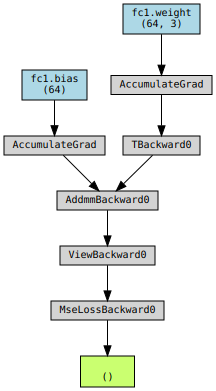

In [22]:
torchviz.make_dot(loss, dict(model.named_parameters()))